# Importing data
## Orbital Parameters
We obtain the Laskar data from the website http://vo.imcce.fr/insola/earth/online/earth/online/index.php also linked to on absalon

We obtain the Berger data from the website https://www.ncei.noaa.gov/pub/data/paleo/climate_forcing/orbital_variations/insolation/ where the data from the Berger paper sited in the paper is found. We also slice the data from 875 kyrs ago (at the insolation minimum mentioned in the paper) until present

In [1]:
import numpy as np
laskar = np.genfromtxt('data/laskar_orbital_data.txt')
laskar_time = laskar[:, 0] # in Julian yrs = 365.25 days
laskar_ecce = laskar[:, 1]
laskar_prec = laskar[:, 2]
laskar_obli = laskar[:, 3]
laskar_inso = laskar[:, 4]

berger = np.genfromtxt('data/berger_orbital_data.txt', skip_header=2)[::-1]
berger_time = berger[:, 0]
berger_ecce = berger[:, 1]
berger_obli = berger[:, 3]    
berger_prec = berger[:, 4]
berger_inso = berger[:, 5]


Slicing the data until 876 kyr and 2000 kyr before the present. (The reason we slice until 874 kyrs, is because the LR04 data below doesn't have a data point for 875 kyr.)

In [2]:
SL_876 = np.where(-876 <= laskar_time)[0] # slice the data from 876 kyrs ago until present 
laskar_time_876 = laskar_time[SL_876]
laskar_inso_876 = laskar_inso[SL_876]
laskar_ecce_876 = laskar_ecce[SL_876]
laskar_obli_876 = laskar_obli[SL_876]
laskar_prec_876 = laskar_prec[SL_876]

SL_2000 = np.where(-2000 <= laskar_time)[0] # slice the data from 2000 kyrs ago until present 
laskar_time_2000 = laskar_time[SL_2000]
laskar_inso_2000 = laskar_inso[SL_2000]
laskar_ecce_2000 = laskar_ecce[SL_2000]
laskar_obli_2000 = laskar_obli[SL_2000]
laskar_prec_2000 = laskar_prec[SL_2000]

SB_876 = np.where(-876 <= berger_time)[0] # slice the data from 876 kyrs ago until present 
berger_time_876 = berger_time[SB_876]
berger_inso_876 = berger_inso[SB_876]
berger_ecce_876 = berger_ecce[SB_876]
berger_obli_876 = berger_obli[SB_876]
berger_prec_876 = berger_prec[SB_876]

SB_2000 = np.where(-2000 <= berger_time)[0] # slice the data from 2000 kyrs ago until present 
berger_time_2000 = berger_time[SB_2000]
berger_inso_2000 = berger_inso[SB_2000]
berger_ecce_2000 = berger_ecce[SB_2000]
berger_obli_2000 = berger_obli[SB_2000]
berger_prec_2000 = berger_prec[SB_2000]

## The LR04 $\delta^{18}\mathrm{O}$ data

In [3]:
LR04record = np.genfromtxt('data/LR04record.txt', dtype=float)
LR04_time = -LR04record[:,0]/1000
LR04_iso = LR04record[:,1]

SLR_876 = np.where(-876 <= LR04_time)[0]
LR04_876 = LR04record[SLR_876]
LR04_time_876 = LR04_time[SLR_876]
LR04_iso_876 = LR04_iso[SLR_876]

SLR_2000 = np.where(-2000 <= LR04_time)[0]
LR04_2000 = LR04record[SLR_2000]
LR04_time_2000 = LR04_time[SLR_2000]
LR04_iso_2000 = LR04_iso[SLR_2000]

In [4]:
EDCrecord = np.genfromtxt('data/EDCrecord.txt', dtype=float)
EDC_time = -EDCrecord[:,0]/1000
EDC_iso = EDCrecord[:,1]

SEDC_876 = np.where(-876 <= EDC_time)[0]
EDC_876 = EDCrecord[SEDC_876]
EDC_time_876 = EDC_time[SEDC_876]
EDC_iso_876 = EDC_iso[SEDC_876]

SEDC_2000 = np.where(-2000 <= EDC_time)[0]
EDC_2000 = EDCrecord[SEDC_2000]
EDC_time_2000 = EDC_time[SEDC_2000]
EDC_iso_2000 = EDC_iso[SEDC_2000]

We normalize the insolation as in the paper by paillard to have mean 0 and unity variance. We do this by subtracting the mean $\mu$ from all the $N$ data points, and then dividing everything by the standard deviation $$\sigma = \sqrt{\frac{\sum (X - \mu)^2}{N}}$$

In [5]:
μ = np.mean(laskar_inso_876)
σ = np.std(laskar_inso_876)
print(f'The mean insolation of LASKAR insolation is μ = {μ.round(2)} W/m^2 and standard deviation is σ = {σ.round(2)} W/m^2.')
i0 = -0.75; i1 = i2 = 0; i3 = 1
i0u = μ + i0*σ; i1u = μ + i1*σ; i2u = μ + i2*σ; i3u = μ + i3*σ
print(f'i0u = {i0u.round(2)} W/m^2, i1u = {i1u.round(2)} W/m^2, i2u = {i2u.round(2)} W/m^2, i3u = {i3u.round(2)} W/m^2')

μ = np.mean(berger_inso_876)
σ = np.std(berger_inso_876)
print(f'The mean insolation of BERGER insolation is μ = {μ.round(2)} W/m^2 and standard deviation is σ = {σ.round(2)} W/m^2.')
i0 = -0.75; i1 = i2 = 0; i3 = 1

i0u = μ + i0*σ; i1u = μ + i1*σ; i2u = μ + i2*σ; i3u = μ + i3*σ
print(f'i0u = {i0u.round(2)} W/m^2, i1u = {i1u.round(2)} W/m^2, i2u = {i2u.round(2)} W/m^2, i3u = {i3u.round(2)} W/m^2')

The mean insolation of LASKAR insolation is μ = 475.34 W/m^2 and standard deviation is σ = 18.3 W/m^2.
i0u = 461.62 W/m^2, i1u = 475.34 W/m^2, i2u = 475.34 W/m^2, i3u = 493.64 W/m^2
The mean insolation of BERGER insolation is μ = 440.42 W/m^2 and standard deviation is σ = 19.77 W/m^2.
i0u = 425.59 W/m^2, i1u = 440.42 W/m^2, i2u = 440.42 W/m^2, i3u = 460.19 W/m^2


In [6]:
def normalize(input):
    data = input.copy()
    mean = np.mean(data)
    std = np.sqrt(np.sum((data - mean)**2)/len(data))
    data -= mean
    data = data/std
    return data

In [7]:
berger_ecce_876n = normalize(berger_ecce_876)
berger_obli_876n = normalize(berger_obli_876)
berger_prec_876n = normalize(berger_prec_876)
berger_inso_876n = normalize(berger_inso_876)

laskar_ecce_876n = normalize(laskar_ecce_876)
laskar_obli_876n = normalize(laskar_obli_876)
laskar_prec_876n = normalize(laskar_prec_876)
laskar_inso_876n = normalize(laskar_inso_876)

LR04_iso_876n = normalize(LR04_iso_876)
EDC_iso_876n = normalize(EDC_iso_876)

# Plotting data

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['lines.linewidth']= 0.8

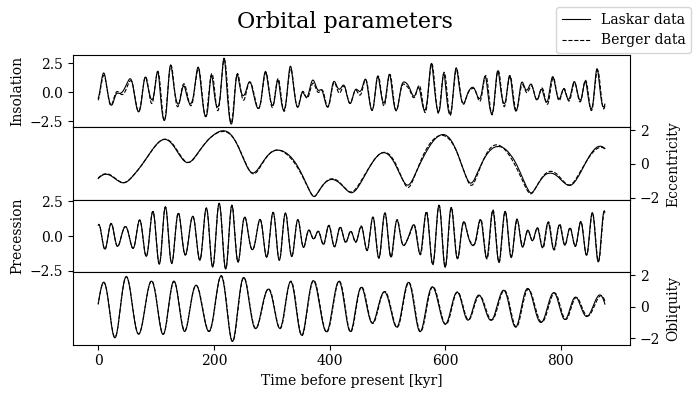

In [9]:
gs = dict(hspace=0)
fig, axs = plt.subplots(4, 1, figsize = (7, 4), sharex=True, gridspec_kw = gs)
fig.suptitle('Orbital parameters', fontsize=16)

axs[0].plot(-laskar_time_876, laskar_inso_876n, 'k')
axs[0].plot(-berger_time_876, berger_inso_876n, 'k--')
axs[0].set_ylabel('Insolation')

axs[1].plot(-laskar_time_876, laskar_ecce_876n, 'k')
axs[1].plot(-berger_time_876, berger_ecce_876n, 'k--')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('Eccentricity')

axs[2].plot(-laskar_time_876, laskar_prec_876n, 'k')
axs[2].plot(-berger_time_876, berger_prec_876n, 'k--')
axs[2].set_ylabel('Precession')

axs[3].plot(-laskar_time_876, laskar_obli_876n, 'k')
axs[3].plot(-berger_time_876, berger_obli_876n, 'k--')
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()
axs[3].set_ylabel('Obliquity')
axs[3].set_xlabel('Time before present [kyr]')

line_laskar  = plt.Line2D([0], [0], label='Laskar data', color='k')
line_berger  = plt.Line2D([0], [0], label='Berger data', color='k', ls='--')
lines = [line_laskar, line_berger]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels)
fig.tight_layout()
# fig.savefig('figs/orbital_parameters.png', dpi=300)


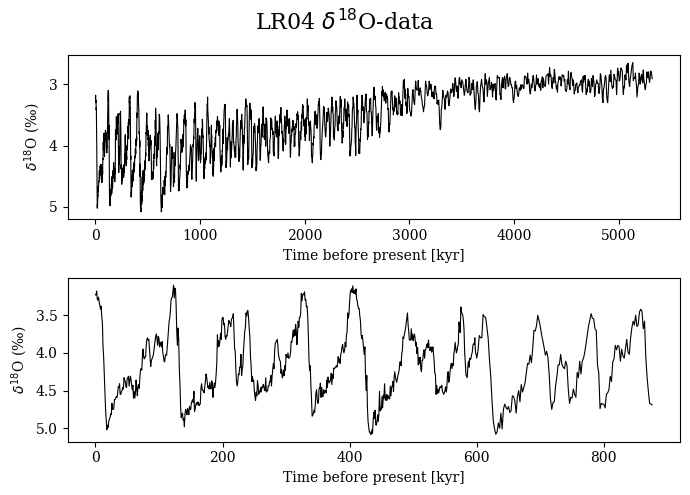

In [10]:
fig, axs = plt.subplots(2,1, figsize = (7, 5))

fig.suptitle('LR04 $δ^{18}$O-data', fontsize=16)
axs[0].plot(-LR04_time, LR04_iso, 'k', lw = 0.8)
axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_xlabel('Time before present [kyr]')
axs[0].set_ylabel(r'$\delta^{18}$O (‰)')

axs[1].plot(-LR04_time_876, LR04_iso_876, 'k', lw = 0.8)
axs[1].set_ylim(axs[1].get_ylim()[::-1])
axs[1].set_xlabel('Time before present [kyr]')
axs[1].set_ylabel(r'$\delta^{18}$O (‰)')

fig.tight_layout()
# fig.savefig('figs/LR04_data.png', dpi=300)


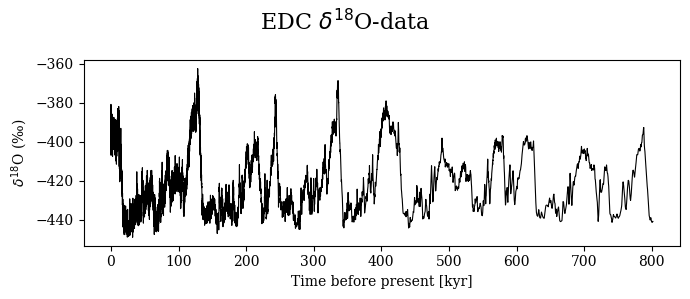

In [11]:
gs = dict(hspace=0)
fig, axs = plt.subplots(1,1, figsize = (7, 3), sharex=True, gridspec_kw = gs)

fig.suptitle('EDC $δ^{18}$O-data', fontsize=16)
axs.plot(-EDC_time, EDC_iso, 'k', lw = 0.8)
axs.set_xlabel('Time before present [kyr]')
axs.set_ylabel(r'$\delta^{18}$O (‰)')

fig.tight_layout()
# fig.savefig('figs/EDC_data.png', dpi=300)

In [12]:
from src.glacial_cycles.utils import f, create_peaks_arr, find_latest_peak_idx
from src.glacial_cycles.models.base import GlacialState
from src.glacial_cycles.models.state import GlacialStateModel
from src.glacial_cycles.simulation import GlacialSimulation
from src.glacial_cycles.plotting import plot_state_model, plot_icevol_model

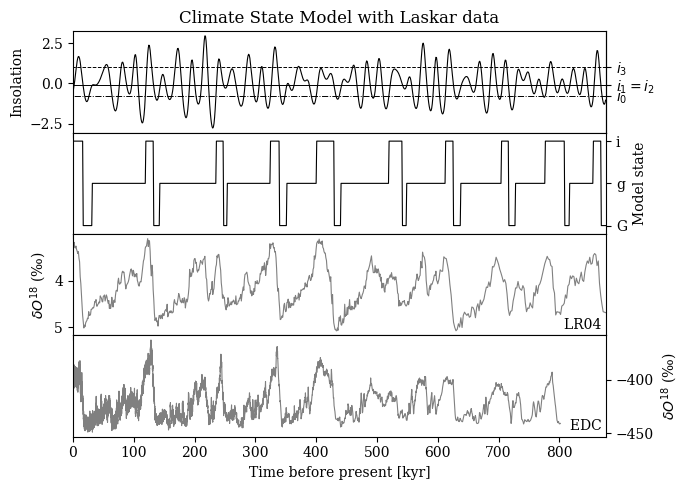

In [13]:
state_model1 = GlacialStateModel(
    state=GlacialState.FULL_GLACIAL,
    i0=-0.75, i1=-0.08, i2=-0.08,
    i3=1.0, tg=33
)
state_model_sim1 = GlacialSimulation(
    model=state_model1,
    time_data=laskar_time_876,
    insolation_data=laskar_inso_876n,
)
state_model_results1 = state_model_sim1.run()
state_model_states1 = [r["state"] for r in state_model_results1]

# State model plot
fig, axs = plot_state_model(
    time=laskar_time_876,
    insolation=laskar_inso_876n,
    states=state_model_states1,
    i0=state_model1.i0,
    i1=state_model1.i1,
    i3=state_model1.i3,
    LR04_time=LR04_time_876,
    LR04_iso=LR04_iso_876,
    EDC_time=EDC_time_876,
    EDC_iso=EDC_iso_876,
    title="Climate State Model with Laskar data",
)
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()
# fig.savefig()"figs/paillard_model1_laskar.png")

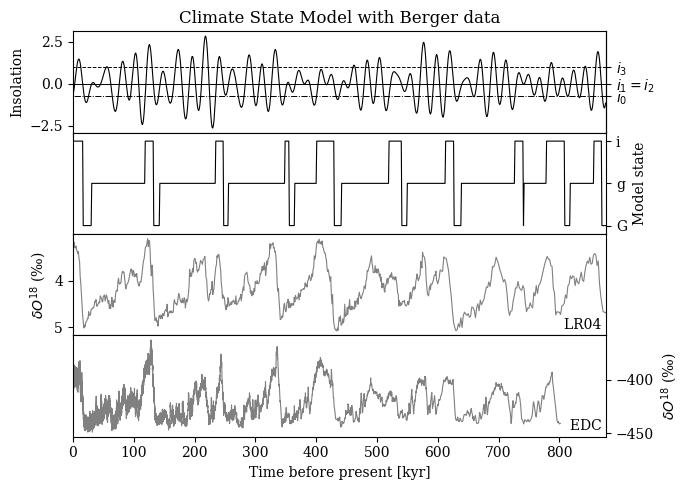

In [14]:
state_model2 = GlacialStateModel(
    state=GlacialState.FULL_GLACIAL,
    i0=-0.75, i1=0.0, i2=0.0,
    i3=1.0, tg=33
)
state_model_sim2 = GlacialSimulation(
    model=state_model2,
    time_data=berger_time_876,
    insolation_data=berger_inso_876n,
)
state_model_results2 = state_model_sim2.run()
state_model_states2 = [r["state"] for r in state_model_results2]

# State model plot
fig, axs = plot_state_model(
    time=berger_time_876,
    insolation=berger_inso_876n,
    states=state_model_states2,
    i0=state_model2.i0,
    i1=state_model2.i1,
    i3=state_model2.i3,
    LR04_time=LR04_time_876,
    LR04_iso=LR04_iso_876,
    EDC_time=EDC_time_876,
    EDC_iso=EDC_iso_876,
    title="Climate State Model with Berger data",
)
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()
# fig.savefig()"figs/paillard_model1_berger.png")

Trying to implement model 2. The change in ice sheet volume is described by

$$\frac{d v}{dt} = \frac{v_\text{R} - v(t)}{\tau_\text{R}} - \frac{F}{\tau_\text{F}},$$

where $v$ is the ice volume, $R$ is the current climate regime $\left(R = \mathbf i, \mathbf g, \mathbf G\right)$, $v_R$ are the reference ice volumes for the different regimes, $F$ is the forcing, $t_R$ and $t_F$ are time constants. The ice volume is normalized to unity: $v_g = v_G = v_\text{max} = 1, v_i = 0$.

In [15]:
from src.glacial_cycles.models.ice_volume import GlacialIceVolumeModel

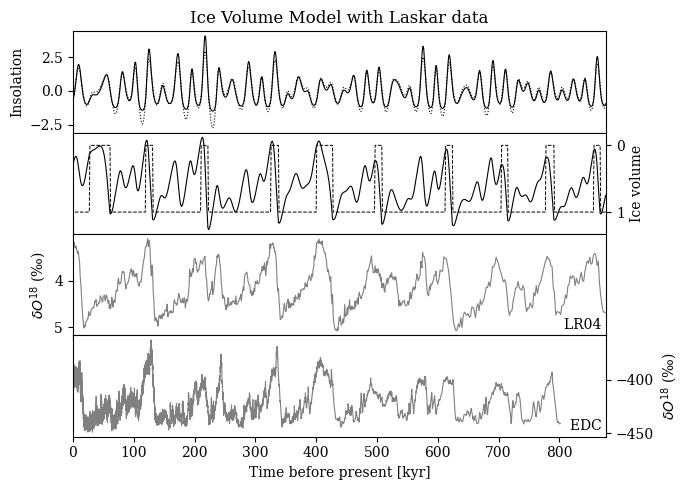

In [16]:
# Calculating and normalizing forcing data
laskar_F_876 = f(laskar_inso_876n, a = 1)
laskar_F_876n = normalize(laskar_F_876)

# Setting parameters and running ice volume model
icevol_model1 = GlacialIceVolumeModel(state = GlacialState.MILD_GLACIAL, v=0.75, vmax=1.0, i0=-0.75, i1=0.0)

icevol_model_sim1 = GlacialSimulation(
    icevol_model1,
    time_data = range(len(laskar_F_876n)),
    insolation_data = laskar_F_876n,
)

icevol_model_results1 = icevol_model_sim1.run()
icevol_model_state_arr1 = [r["state"] for r in icevol_model_results1]
icevol_model_icevol_arr1 = [r["ice_volume"] for r in icevol_model_results1]

# Ice volume model plot
fig, axs = plot_icevol_model(
    time=laskar_time_876,
    insolation=laskar_inso_876n,
    forcing=laskar_F_876n,
    ice_volume=icevol_model_icevol_arr1,
    states=icevol_model_state_arr1,
    vR=np.array([1,1,0]),
    LR04_time=LR04_time_876,
    LR04_iso=LR04_iso_876,
    EDC_time=EDC_time_876,
    EDC_iso=EDC_iso_876,
    title="Ice Volume Model with Laskar data",
)
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()
# fig.savefig("figs/paillard_model2_laskar.png")

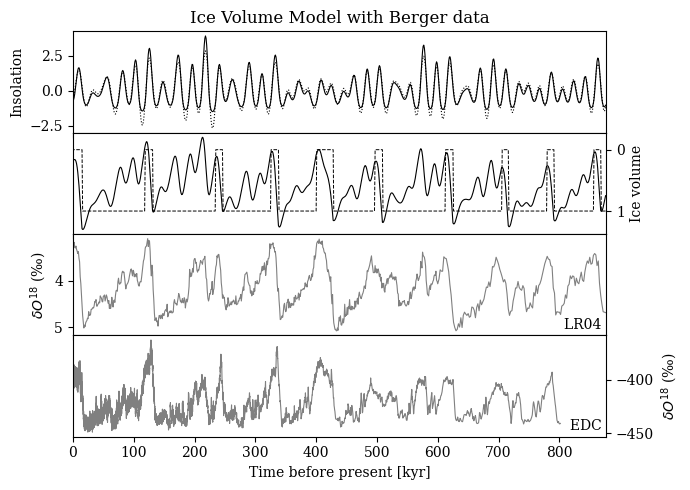

In [17]:
# Calculating and normalizing forcing data
berger_F_876 = f(berger_inso_876n, a = 1)
berger_F_876n = normalize(berger_F_876)

# Setting parameters and running ice volume model
icevol_model2 = GlacialIceVolumeModel(
    state=GlacialState.MILD_GLACIAL,
    v=0.75, vmax=1.0, i0=-0.75, i1=0.0
)
icevol_model_sim2 = GlacialSimulation(
    model=icevol_model2,
    time_data = range(len(berger_F_876n)),
    insolation_data = berger_F_876n,
)
icevol_model_results2 = icevol_model_sim2.run()
icevol_model_state_arr2 = [r["state"] for r in icevol_model_results2]
icevol_model_icevol_arr2 = [r["ice_volume"] for r in icevol_model_results2]

# Ice volume model plot
fig, axs = plot_icevol_model(
    time=berger_time_876,
    insolation=berger_inso_876n,
    forcing=berger_F_876n,
    ice_volume=icevol_model_icevol_arr2,
    states=icevol_model_state_arr2,
    vR=np.array([1,1,0]),
    LR04_time=LR04_time_876,
    LR04_iso=LR04_iso_876,
    EDC_time=EDC_time_876,
    EDC_iso=EDC_iso_876,
    title="Ice Volume Model with Berger data",
)
fig.set_figwidth(7)
fig.set_figheight(5)
fig.tight_layout()
# fig.savefig("figs/paillard_model2_berger.png")

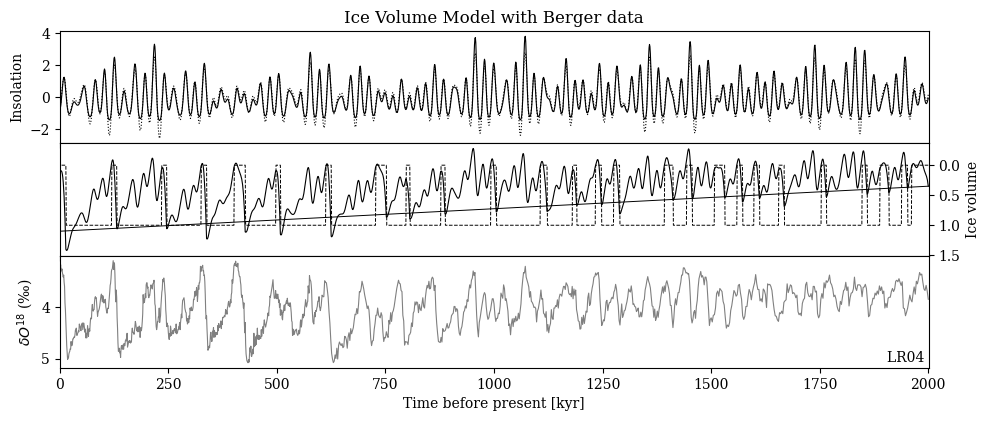

In [18]:
# Adding linear trend to insolation
for i in range(len(berger_inso_2000)):
    berger_inso_2000[len(berger_inso_2000) - 1 - i] += i * 0.003

# Normalizing insolation data
berger_inso_2000n = normalize(berger_inso_2000)

# Calculating and normalizing forcing data
F_data3 = f(berger_inso_2000n, a = 1)
F_data3 = normalize(F_data3)
T_data3 = np.arange(len(berger_time_2000))
icevol_model3 = GlacialIceVolumeModel(
    state=GlacialState.INTERGLACIAL,
    v=0.35, i0=-0.75, i1=0.0, τF = 28,
    state_params = np.array([[80.0, 1.0], [80.0, 1.0], [5.0, 0.0]])
)
icevol_model_sim3 = GlacialSimulation(
    model = icevol_model3,
    time_data = T_data3,
    insolation_data = F_data3,
    param_schedules = {'vmax': lambda t: (1.1 - 0.35)/len(berger_time_2000) * t + 0.35}
)

icevol_model_results3 = icevol_model_sim3.run()
icevol_model_state_arr3 = [r["state"] for r in icevol_model_results3]
icevol_model_icevol_arr3 = [r["ice_volume"] for r in icevol_model_results3]

# Ice volume model plot
fig, axs = plot_icevol_model(
    time=berger_time_2000,
    insolation=berger_inso_2000n,
    forcing=F_data3,
    ice_volume=icevol_model_icevol_arr3,
    states=icevol_model_state_arr3,
    vR=np.array([1,1,0]),
    LR04_time=LR04_time_2000,
    LR04_iso=LR04_iso_2000,
    title="Ice Volume Model with Berger data",
)
_ = axs[1].plot(-berger_time_2000, icevol_model_sim3.param_schedules['vmax'](icevol_model_sim3.time_data), 'k', lw=0.7, label='$v_{max}$')
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout()
# fig.savefig('figs/paillard_model3_berger.png')

1 1.0
600 2.0
1050 2.5
1650 5.0


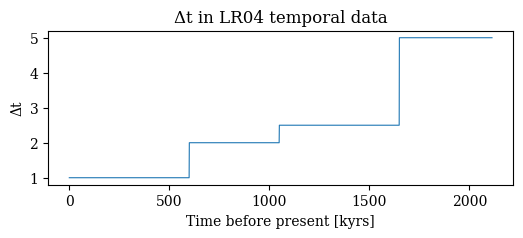

In [19]:
_ = plt.figure(figsize=(6,2))
LR04_dtime = np.diff(-LR04_time)

W = np.where(np.diff(-LR04_time))
#plt.plot(-LR04_time[W])
plt.plot(LR04_dtime)
plt.xlabel('Time before present [kyrs]')
plt.ylabel('Δt')
plt.title('Δt in LR04 temporal data')

for i in range(1, len(LR04_dtime)):
    if LR04_dtime[i] != LR04_dtime[i-1] or i == 1:
        print(i, LR04_dtime[i])

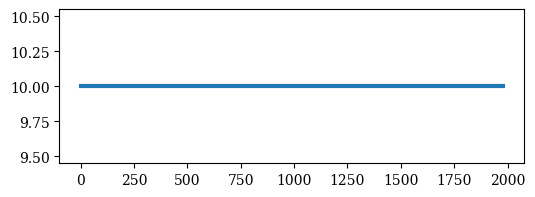

In [20]:
LR04_time_alt = np.concatenate((LR04_time[:600][::10], LR04_time[600:1050][::5], LR04_time[1050:1650][::4]))
LR04_iso_alt = np.concatenate((LR04_iso[:600][::10], LR04_iso[600:1050][::5], LR04_iso[1050:1650][::4]))
LR04_norm_alt = normalize(LR04_iso_alt)
LR04_norm_alt = LR04_norm_alt[:len(icevol_model_icevol_arr3)//10]
LR04_time_alt = LR04_time_alt[:len(icevol_model_icevol_arr3)//10]
_ = plt.figure(figsize=(6,2))
_ = plt.plot(-LR04_time_alt[:-1], np.diff(-LR04_time_alt), lw = 3)

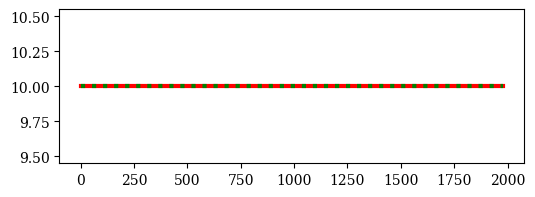

In [21]:
_ = plt.figure(figsize=(6,2))
_ = plt.plot(-LR04_time_alt[:-1], np.diff(-LR04_time_alt), color='red', lw=3)
_ = plt.plot(-LR04_time_alt[:-1], np.diff(berger_time[::10][:len(LR04_time_alt)]), color='green', ls=':', lw=3)

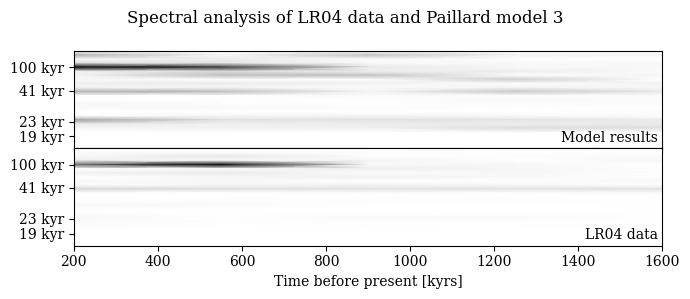

In [22]:
from scipy.signal import spectrogram
sig1 = LR04_norm_alt
sig2 = np.array(icevol_model_icevol_arr3[::-1][::10])

fs = 1/10
windowsize = 40
f1, t1, Sxx1 = spectrogram(sig1, fs, nperseg = windowsize)
f2, t2, Sxx2 = spectrogram(sig2, fs, nperseg = windowsize)

gs = dict(hspace = 0, wspace=0)
fig, axs = plt.subplots(2, 1, figsize = (7, 3), sharex=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of LR04 data and Paillard model 3')

axs[0].set_title('Model results ', loc='right', y = -0.02, fontsize = 10)
axs[0].pcolormesh(t2, f2, Sxx2, cmap='Greys', shading = 'gouraud')
# axs[0].set_ylabel('Freq [1/kyr]')
# axs[0].set_xlabel('time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
axs[0].set_yticks(yticks, ylabels)
axs[0].set_ylim(0.06, 0)

axs[1].set_title('LR04 data ', loc='right', y = -0.02, fontsize = 10)
axs[1].pcolormesh(t1, f1, Sxx1, cmap='Greys', shading = 'gouraud')
# axs[1].set_ylabel('Freq [1/kyr]')
axs[1].set_xlabel('Time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
axs[1].set_yticks(yticks, ylabels)
axs[1].set_ylim(0.06, 0)

fig.tight_layout()
# fig.savefig('figs/spec_analysis.png', dpi=300)

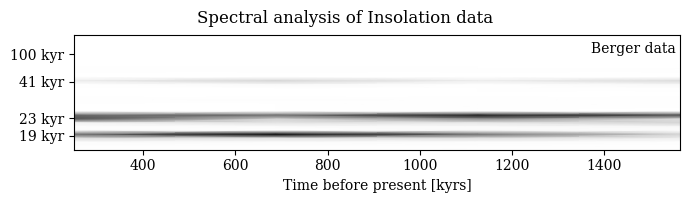

In [23]:
from scipy.signal import spectrogram
sig3 = berger_inso_2000n

fs = 1
windowsize = 500
f3, t3, Sxx3 = spectrogram(sig3, fs, nperseg = windowsize)

gs = dict(hspace = 0, wspace=0)
fig, ax = plt.subplots(1, 1, figsize = (7, 2.2), sharex=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of Insolation data', y = 0.9)

ax.set_title('Berger data ', loc='right', y = 0.77, fontsize = 10)
ax.pcolormesh(t3, f3, Sxx3, cmap='Greys', shading = 'gouraud')
# ax.set_ylabel('Freq [1/kyr]')
ax.set_xlabel('Time before present [kyrs]')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
ax.set_yticks(yticks, ylabels)
ax.set_ylim(0.06, 0)

fig.tight_layout()
# fig.savefig('figs/spec_analysis_inso.png', dpi=300)

Text(0.5, 0, 'Time before present [kyrs]')

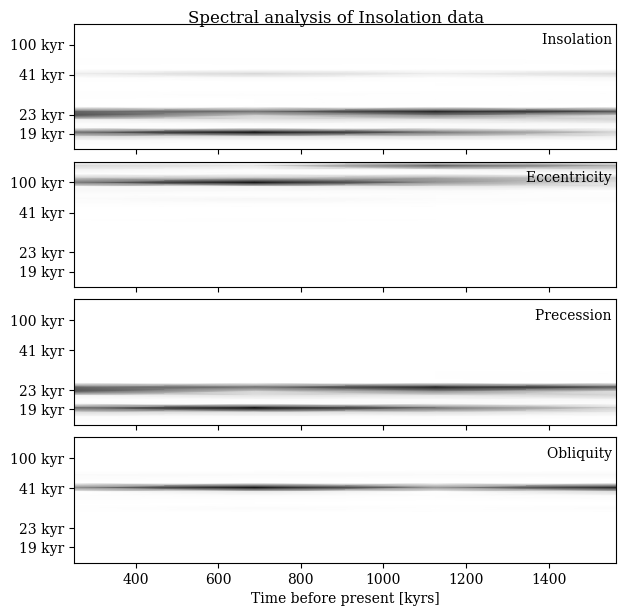

In [24]:
from scipy.signal import spectrogram
berger_ecce_2000n = normalize(berger_ecce_2000)
berger_prec_2000n = normalize(berger_prec_2000)
berger_obli_2000n = normalize(berger_obli_2000)
sig1 = berger_inso_2000n
sig2 = berger_ecce_2000n
sig3 = berger_prec_2000n
sig4 = berger_obli_2000n

fs = 1
windowsize = 500
f1, t1, Sxx1 = spectrogram(sig1, fs, nperseg = windowsize)
f2, t2, Sxx2 = spectrogram(sig2, fs, nperseg = windowsize)
f3, t3, Sxx3 = spectrogram(sig3, fs, nperseg = windowsize)
f4, t4, Sxx4 = spectrogram(sig4, fs, nperseg = windowsize)

gs = dict(hspace = 0.1, wspace=0)
fig, ax = plt.subplots(4, 1, figsize = (7,7), sharex=True, sharey=True, gridspec_kw=gs)

fig.suptitle('Spectral analysis of Insolation data', y = 0.9)

ax[0].set_title('Insolation ', loc='right', y = 0.77, fontsize = 10)
ax[0].pcolormesh(t1, f1, Sxx1, cmap='Greys', shading = 'gouraud')
yticks = (1/100, 1/41, 1/23, 1/19)
ylabels = ['100 kyr', '41 kyr', '23 kyr', '19 kyr']
ax[0].set_yticks(yticks, ylabels)
ax[0].set_ylim(0.06, 0)

ax[1].set_title('Eccentricity ', loc='right', y = 0.77, fontsize = 10)
ax[1].pcolormesh(t2, f2, Sxx2, cmap='Greys', shading = 'gouraud')

ax[2].set_title('Precession ', loc='right', y = 0.77, fontsize = 10)
ax[2].pcolormesh(t3, f3, Sxx3, cmap='Greys', shading = 'gouraud')

ax[3].set_title('Obliquity ', loc='right', y = 0.77, fontsize = 10)
ax[3].pcolormesh(t4, f4, Sxx4, cmap='Greys', shading = 'gouraud')
ax[3].set_xlabel('Time before present [kyrs]')

# fig.tight_layout()
# fig.savefig('figs/spec_analysis_inso.png', dpi=300)